In [462]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')
sys.path.insert(0, '../driftpy/src/')

import pandas as pd 
import numpy as np 

pd.options.plotting.backend = "plotly"

In [463]:
luna_trades.columns

Index(['id', 'programId', 'recordId', 'userAuthority', 'user',
       'baseAssetAmount', 'quoteAssetAmount', 'markPriceBefore',
       'markPriceAfter', 'fee', 'referrerReward', 'refereeDiscount',
       'tokenDiscount', 'liquidation', 'direction', 'blockchainTimestamp',
       'serverTimestamp', 'marketIndex', 'historyIndex', 'oraclePrice',
       'quoteAssetAmountSurplus'],
      dtype='object')

In [464]:
# luna_trades = pd.read_csv('/Users/zanes/Downloads/5.csv')
# (luna_trades[['oraclePrice', 'markPriceAfter']]/1e10).tail(100000).plot()

In [465]:
# !pwd

In [466]:
# (luna_trades.groupby('blockchainTimestamp')['oraclePrice'].last()/1e10).tail(50000).to_csv('lunaCrash/oracle.csv')

In [467]:
experiment = 'lunaCrash'

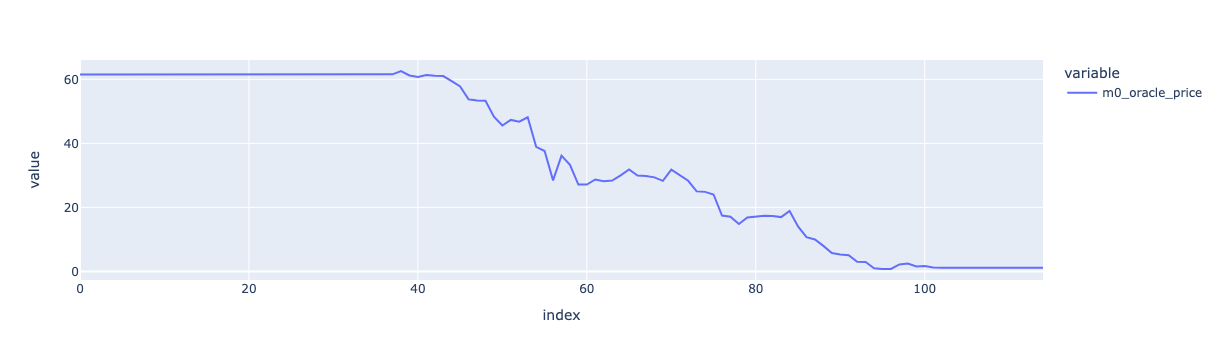

In [468]:
df = pd.read_csv(experiment+'/chs.csv')
df.columns
df['m0_oracle_price'].plot()

In [469]:
# trial_guard = pd.read_csv('leverage10x/trial_oracle_guards/result_market0.csv')

In [470]:
result = pd.read_csv(experiment+'/trial_no_oracle_guards/result_market0.csv')
print(result.shape)

(161, 102)


In [471]:
str(result.columns.tolist())

"['pubkey', 'amm', 'pnl_pool', 'expiry_price', 'number_of_users', 'imf_factor', 'unrealized_pnl_imf_factor', 'unrealized_pnl_max_imbalance', 'liquidator_fee', 'if_liquidation_fee', 'insurance_claim', 'expiry_ts', 'next_fill_record_id', 'next_funding_rate_record_id', 'next_curve_record_id', 'margin_ratio_initial', 'margin_ratio_maintenance', 'unrealized_pnl_initial_asset_weight', 'unrealized_pnl_maintenance_asset_weight', 'market_index', 'status', 'contract_type', 'contract_tier', 'oracle', 'historical_oracle_data', 'base_asset_amount_per_lp', 'quote_asset_amount_per_lp', 'fee_pool', 'last_oracle_normalised_price', 'last_oracle_reserve_price_spread_pct', 'base_asset_reserve', 'quote_asset_reserve', 'concentration_coef', 'min_base_asset_reserve', 'max_base_asset_reserve', 'sqrt_k', 'peg_multiplier', 'terminal_quote_asset_reserve', 'base_asset_amount_long', 'base_asset_amount_short', 'base_asset_amount_with_amm', 'base_asset_amount_with_unsettled_lp', 'quote_asset_amount_long', 'quote_ass

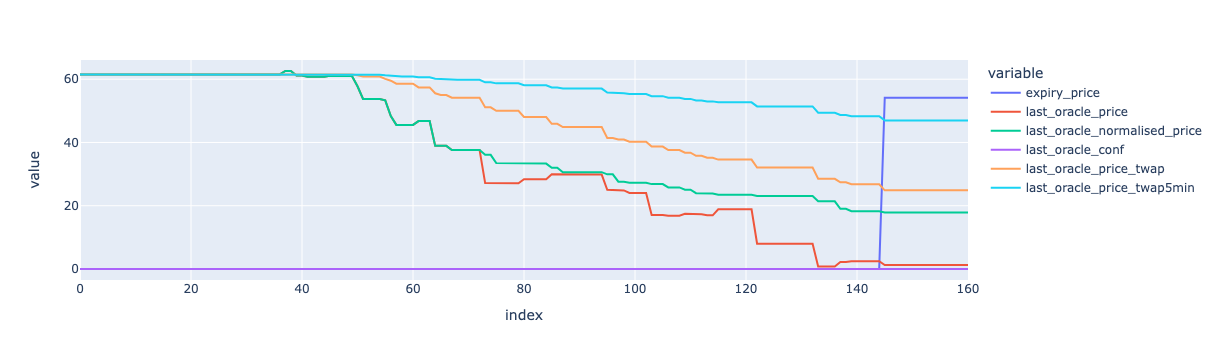

In [472]:
(result[['expiry_price', 
         'last_oracle_price',
         'last_oracle_normalised_price',
         'last_oracle_conf',
         'last_oracle_price_twap',
         'last_oracle_price_twap5min',
        ]]/1e6).plot()

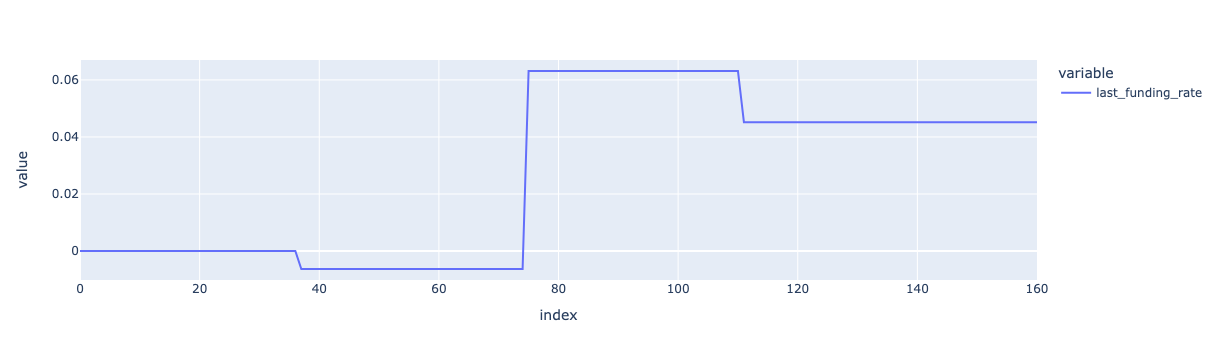

In [473]:
(result['last_funding_rate']/1e9).plot()

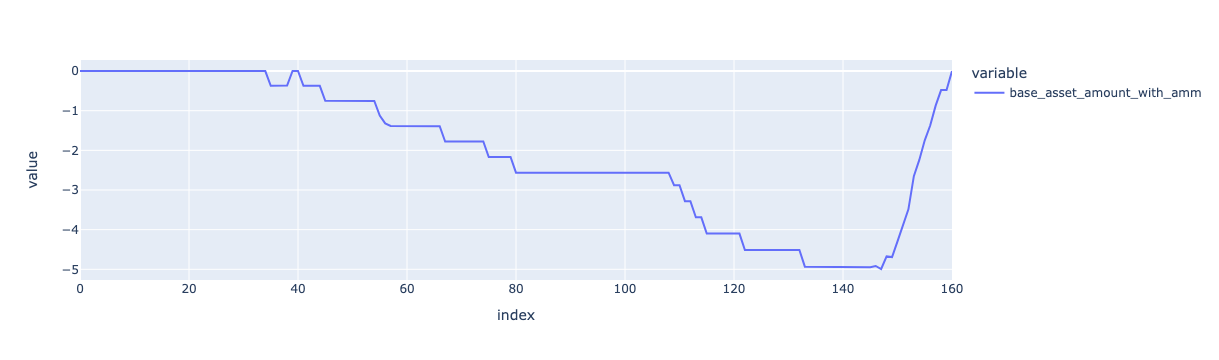

In [474]:
(result.base_asset_amount_with_amm/1e9).plot()

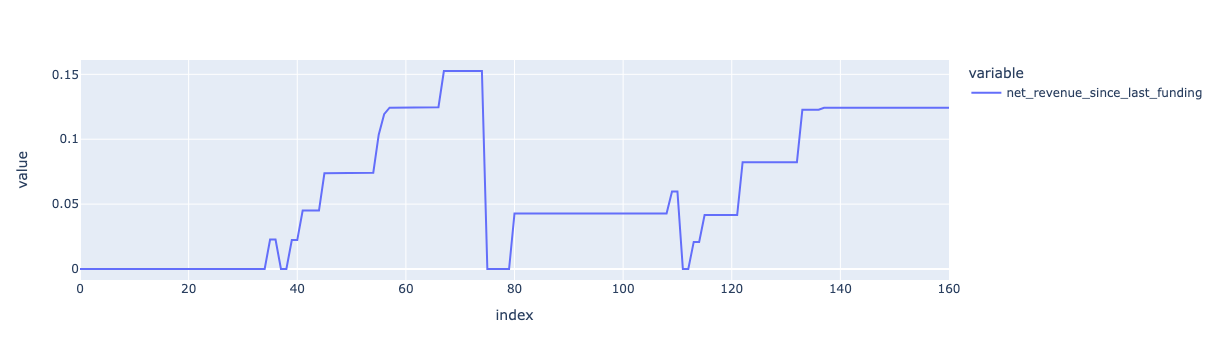

In [475]:
(result.net_revenue_since_last_funding/1e6).plot()

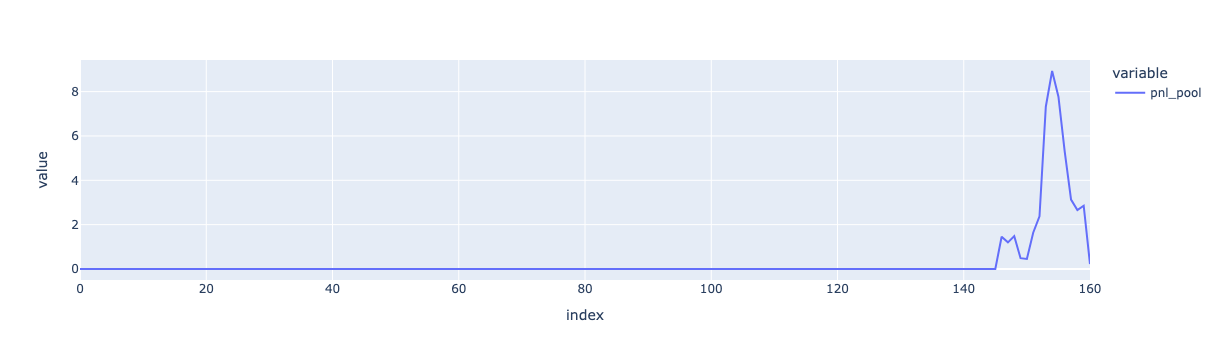

In [476]:
(result.pnl_pool.apply(lambda x: x.split('scaled_balance=')[-1].split(',')[0]).astype(float)/1e9).plot()

read user


In [477]:
puk = 'Hd4tmsweQz7PCgkMFgKCGz5QdReAdoY1Leo8XbP6FtpM'
user_levloss = pd.read_csv('lunaCrash/trial_no_oracle_guards/result_user_'+puk+'.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'lunaCrash/trial_no_oracle_guards/result_user_Hd4tmsweQz7PCgkMFgKCGz5QdReAdoY1Leo8XbP6FtpM.csv'

In [ ]:
user_levloss.perp_positions.values[0]

In [ ]:
def get_field(ser, field):
    return ser.apply(lambda x: x.split(field+'=')[-1].split(',')[0]).astype(float)


(get_field(user_levloss.spot_positions, 'scaled_balance')/1e9).plot()

In [ ]:
# user_levloss.perp_positions.values

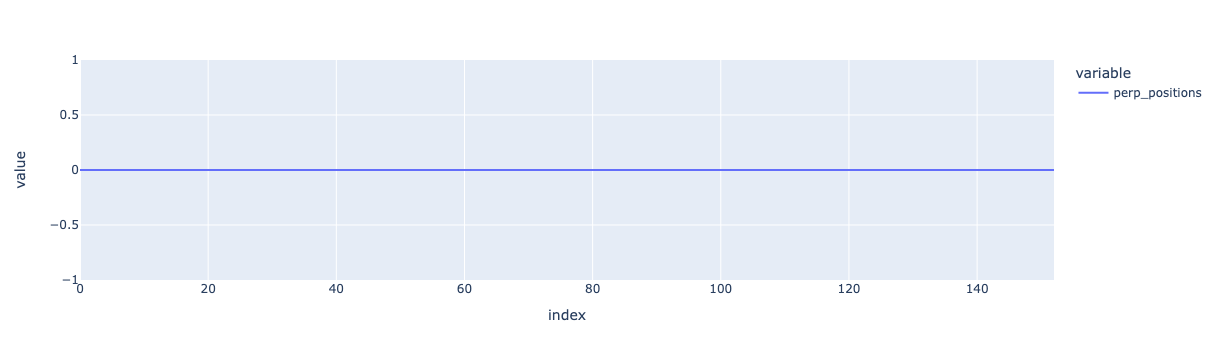

In [460]:
(get_field(user_levloss.perp_positions, 'lp_shares')/1e6).plot()

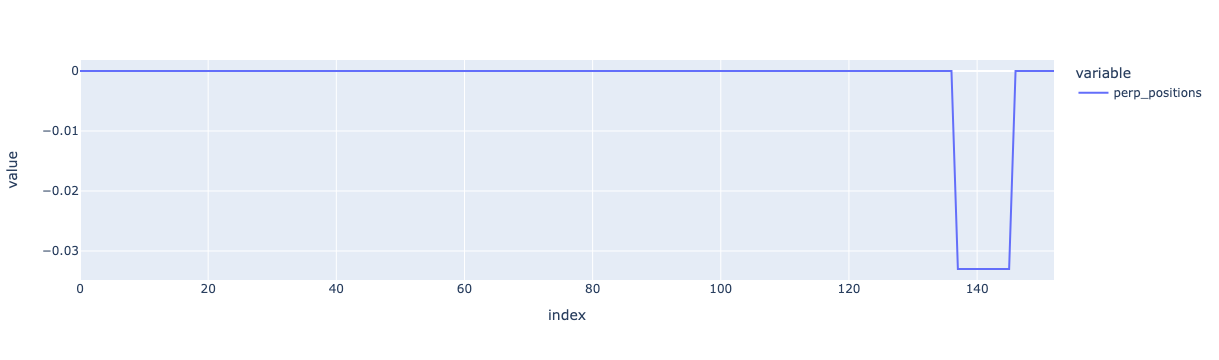

In [461]:
(get_field(user_levloss.perp_positions, ' base_asset_amount')/1e9).plot()

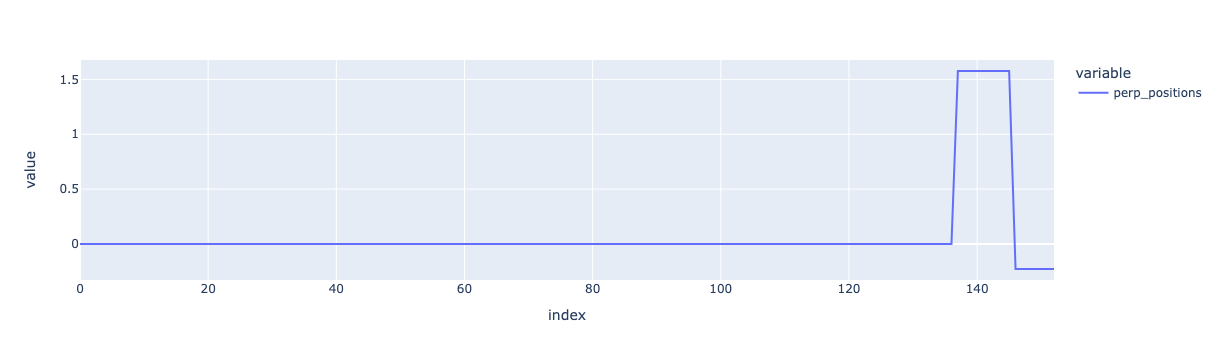

In [431]:
(get_field(user_levloss.perp_positions, ' quote_asset_amount')/1e6).plot()